# COCO Dataset

In [1]:
import sys
sys.path.append('../../')

%load_ext autoreload
%autoreload 2

from dl.data.txtdetn import augmentations, datasets, target_transforms, transforms
from dl.models.ssd.textboxespp import TextBoxesPP

In [2]:
augmentation = None

transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.Normalize(rgb_means=(0.485, 0.456, 0.406), rgb_stds=(0.229, 0.224, 0.225))]
    ]
)
target_transform = target_transforms.Compose(
    [target_transforms.Corners2Centroids(),
     target_transforms.ToQuadrilateral(),
     target_transforms.ToTensor()]
)
dataset = datasets.COCO2014Text_Dataset(ignore=target_transforms.Ignore(illegible=False), transform=transform, target_transform=target_transform, augmentation=None)

model = TextBoxesPP().cuda()
defaultbox = model.defaultBox

loading annotations into memory...
0:00:01.030647
creating index...
index created!


In [3]:
from dl.data.utils.boxes import centroids2corners
#from ssd.core.inference import toVisualizeRectangleRGBimg
from dl.data.utils.converter import toVisualizeQuadsRGBimg, toVisualizeRectRGBimg, tensor2cvrgbimg

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2, torch
dataset[0]

(tensor([[[0.0314, 0.0314, 0.0314,  ..., 0.0118, 0.0235, 0.0392],
          [0.0235, 0.0235, 0.0275,  ..., 0.0275, 0.0353, 0.0431],
          [0.0275, 0.0275, 0.0314,  ..., 0.0510, 0.0510, 0.0431],
          ...,
          [0.0431, 0.0431, 0.0392,  ..., 0.6392, 0.6196, 0.6118],
          [0.0353, 0.0353, 0.0353,  ..., 0.6235, 0.6196, 0.6196],
          [0.0353, 0.0392, 0.0392,  ..., 0.6118, 0.6000, 0.5961]],
 
         [[0.0314, 0.0314, 0.0314,  ..., 0.0118, 0.0235, 0.0392],
          [0.0235, 0.0235, 0.0275,  ..., 0.0275, 0.0353, 0.0431],
          [0.0275, 0.0275, 0.0314,  ..., 0.0510, 0.0510, 0.0431],
          ...,
          [0.0431, 0.0431, 0.0392,  ..., 0.5686, 0.5490, 0.5412],
          [0.0353, 0.0353, 0.0353,  ..., 0.5569, 0.5451, 0.5451],
          [0.0353, 0.0392, 0.0392,  ..., 0.5451, 0.5294, 0.5333]],
 
         [[0.0314, 0.0314, 0.0314,  ..., 0.0118, 0.0314, 0.0471],
          [0.0235, 0.0235, 0.0275,  ..., 0.0275, 0.0353, 0.0431],
          [0.0275, 0.0275, 0.0314,  ...,

<IPython.core.display.Javascript object>


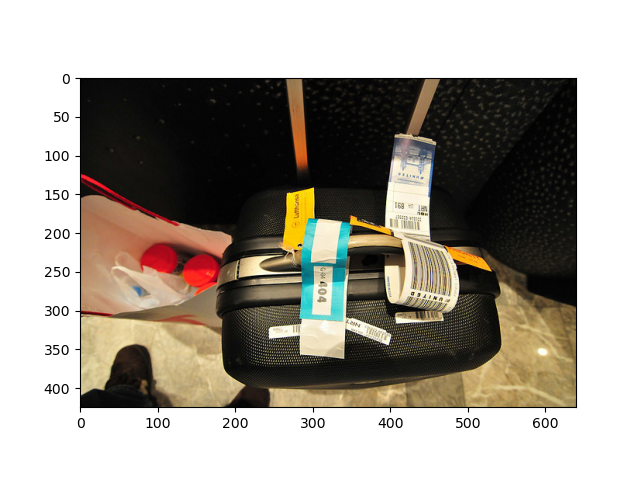

In [4]:
img, targets, texts = dataset[0]

plt.figure()
plt.imshow(tensor2cvrgbimg(img))

[96, 96] 184320 0


<IPython.core.display.Javascript object>


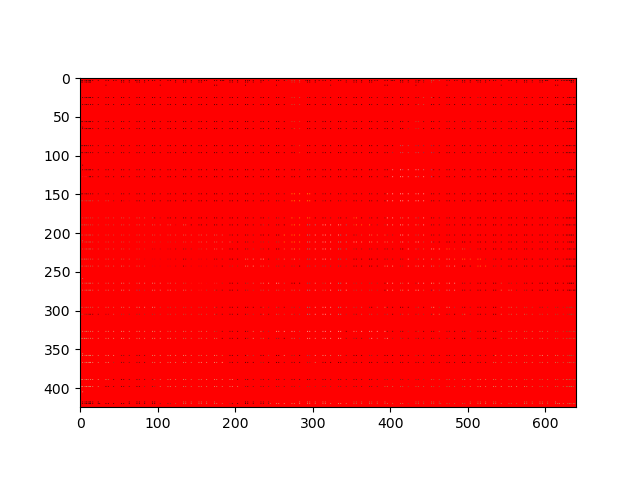

[48, 48] 46080 184320


<IPython.core.display.Javascript object>


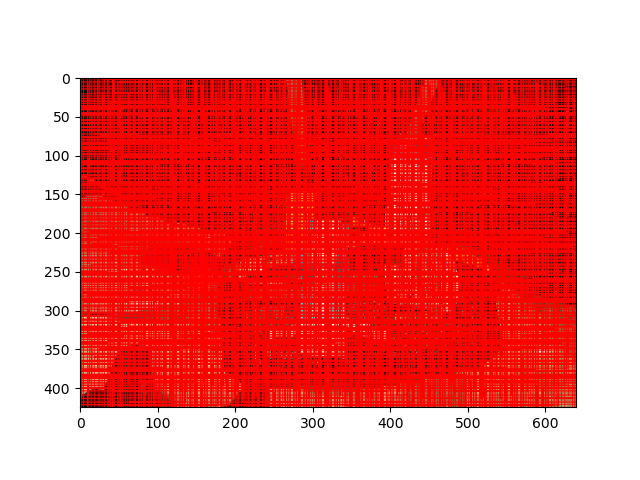

[24, 24] 11520 230400


<IPython.core.display.Javascript object>


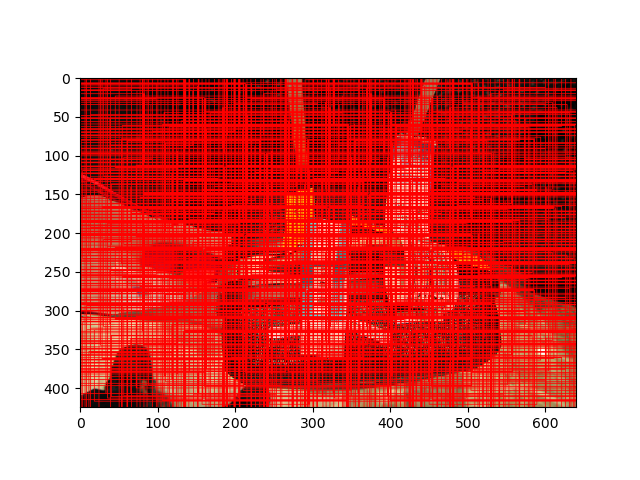

[12, 12] 2880 241920


<IPython.core.display.Javascript object>


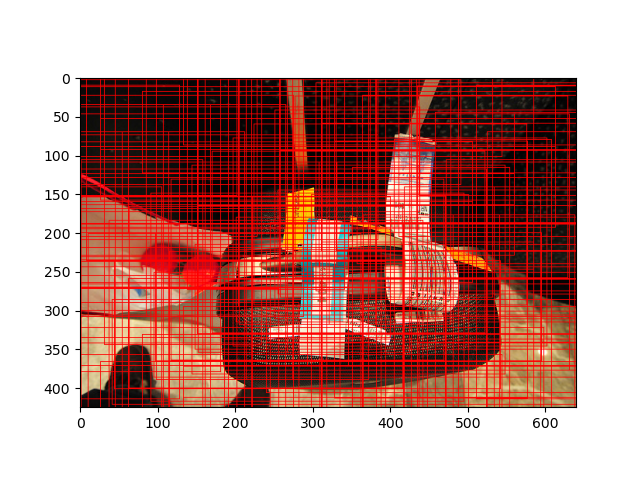

[10, 10] 2000 244800


<IPython.core.display.Javascript object>


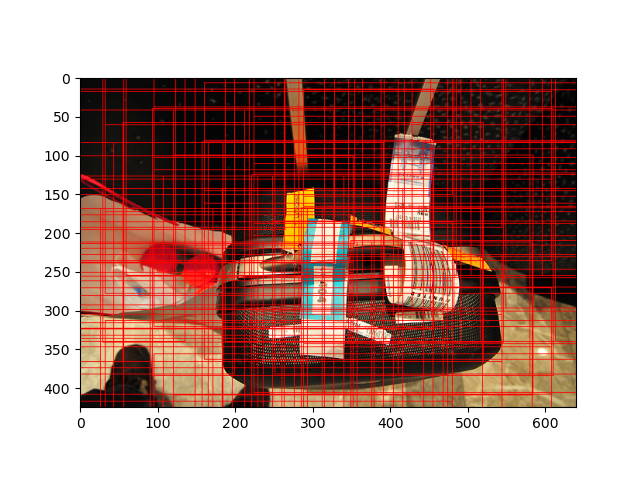

[8, 8] 1280 246800


<IPython.core.display.Javascript object>


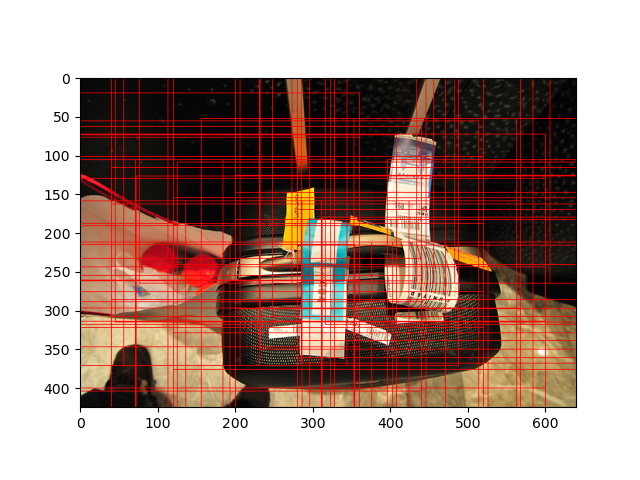

In [5]:
box_s = 0
for fmap_size, box_num in zip(defaultbox.fmap_sizes, defaultbox.dbox_num_per_fmap):
    print(fmap_size, box_num, box_s)
    #resized_img = cv2.resize(img, tuple(fmap_size))
    
    dboxes = defaultbox.dboxes
    
    #resized_img = box_show(resized_img, dboxes[58::1000])
    dbox_img = toVisualizeRectRGBimg(img, dboxes[box_s:box_s+box_num:22], thickness=1)
    
    plt.figure()
    #plt.imshow(resized_img)
    plt.imshow(dbox_img)

    box_s += box_num